# 🎥 [ULSAN - 💫얼레벌레] 
      - 넷플릭스 vs 아마존 나에게 맞는 플랫폼 찾기


- 이번 주는 개인으로 LMS 노드를 따라 진행하는 것이 아닌, 팀원들과 힘을 모아 정제되지 않은 데이터를 가지고 원하는 목적에 맞는 작업을 해 보았습니다.


- 데이터 셋 4개 전부 확인 본 결과 디즈니 플러스 데이터 셋에는 데이터 양이 적었고, 훌루는 조사해보니 미국과 일본에만 사용하고 있었기 때문에, 최종으로 데이터 양이 제일 많았던 **넷플릭스**와 **아마존 프라임** 데이터 셋을 이용하기로 하였습니다. 이 두 개의 데이터를 바탕으로 해당 OTT 플랫폼 서비스를 어떻게 활용하면 좋을 지에 대해 생각하게 되었습니다.


----

# 데이터톤 평가 항목 


| 항목 | 100 |
| :---: | :---: |
| EDA 및 시각화가 적절하게 이루어졌는가? | 15 |
| 데이터 분석을 통한 인사이트가 도출이 잘 되었는가? | 15 |
| 도출한 인사이트를 통해 설득력이 충분하였는가? | 20 |
| 팀원들이 협업을 통해 프로젝트를 수행하고 발표를 진행하였는가? | 25 |
| 발표시간을 준수하였는지? | 25 |
| 가점 : 교육생 여러분들의 평가 (참신해요, 흥미있어요, 좋아요) | - |

# 사용할 데이터셋 


### [넷플릭스 데이터셋](https://www.kaggle.com/shivamb/netflix-shows)   


###  [아마존 프라임 데이터셋](https://www.kaggle.com/shivamb/amazon-prime-movies-and-tv-shows)

---



# 목차 


## 1. 데이터 가져오기 및 라이브러리 불러오기 

## 2. Netflix 데이터 살펴보기 

## 3. Netflix 데이터 전처리하기 

## 4. Netflix 데이터 시각화 하기 

## 5. Amazon Prime 데이터 살펴보기

## 6. Amazon Prime 데이터 전처리하기 

## 7. Amazon Prime 데이터 시각화 하기 

## 회고!

## 🖇️ 참고페이지 

----

# 1. 데이터 가져오기 및 라이브러리 불러오기


* 이번시간에 필요한 데이터와 라이브러리를 가져옵니다. 
* 데이터의 경우, 위 데이터셋 페이지에서 다운로드 해, 디렉토리에 업로드 하였습니다. 

## &nbsp;&nbsp; 1-1 라이브러리 불러오기 


* 이번 프로젝트에 필요한 라이브러리를 불러옵니다. 
* 조금 더 귀엽고 보기 좋은 시각화 툴을 가져오기 위해 설치 과정을 거칩니다. 

In [197]:
# 시각화 툴 인스톨 - cutecarts 
!pip install cutecharts

In [198]:
# 라이브러리 불러오기 
import numpy as np
import pandas as pd 

import os
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

from os.path import join
import cutecharts.charts as ctc

## &nbsp;&nbsp; 1-2 데이터 가져오기 


* 이번 프로젝트에 사용될 넷플릭스와 아마존프라임 데이터셋을 불러옵니다.  

In [199]:
# 넷플릭스 데이터셋 불러오기 
netflix_dir = os.getenv('HOME')+'/aiffel/datathon_220311/dataset'

netflix_path = join(data_dir, 'netflix_titles.csv')
netflix = pd.read_csv(netflix_path, encoding = 'ISO-8859-1')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [200]:
# 아마존 프라임 데이터셋 불러오기 
amazon_dir = os.getenv('HOME')+'/aiffel/datathon_220311/dataset'

amazon_path = join(data_dir, 'amazon_prime_titles.csv')
amazon = pd.read_csv(amazon_path, encoding = 'ISO-8859-1')
amazon.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, BeyoncÃ©, Britne...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


---

# 2. Netflix 데이터 살펴보기


* 우선 넷플릭스 데이터셋 먼저 확인 해보겠습니다. 
* 가져온 넷플릭스 데이터셋을 캐글 홈페이지에 있는 설명을 가져와 각 column을 확인 해 봅니다. 
* Pandas 통계 관련 메소드를 통해 간단한 정보를 알아보겠습니다. 

In [201]:
# 가져온 데이터셋의 전반적인 정보를 확인합니다. 
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [202]:
# 데이터셋에 포함되어있는 열 정보를 나열합니다. 
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

* data가 포함되어있는 열은 총 8807개 이며, 12개의 columns로 이루어져있습니다. 

| 타입  | columns 명  | 설명  |
| --- | --- | --- |
| string type | 'show_id' | 모든 영화/TV 프로그램에 대한 고유 ID |
|  | 'type' | 식별자 - 영화 or TV 프로그램 |
|  |  'title' | 영화/TV 프로그램 제목 |
|  | 'director' | 영화 감독 |
|  | 'cast’ | 영화 / 쇼에 참여한 배우  |
|  | 'country' | 영화/쇼가 제작된 국가 |
|  | 'rating' | 영화/쇼의 영상물 심의 등급 (미국 기준) |
|  | 'duration' | 러닝타임  - 영화 : 분 / Tv show : 시즌 수 |
|  | 'listed_in' | 영화/쇼 의 장르 |
|  | 'description' | 요약 설명 |
| DateTime | 'date_added' | Netflix에 추가된 날짜 |
| Integer type  | 'release_year' | 영화/쇼 의 실제 출시 연도 |

In [203]:
#release_year 에 대한 통계량을 확인합니다. 
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


* 위 통계량으로 데이터셋에 있는 영화/쇼가 **가장 오래된 년도는 1925년**, **가장 최근년도는 2021년** 임을 알 수 있다.  
  (본 데이터는 2021년 기준의 데이터셋 입니다.) 

* 각 columns의 데이터 수량과, 고유값을 `describe`를 통해 나타내었고,   
  컬럼 정보를 `transpose`를 통해 오른쪽으로 둬 보기 쉽게 처리하였습니다. 

In [204]:
netflix.describe(include='object').transpose()

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


----

# 3. Netflix 데이터 전처리하기 

* 데이터셋을 목적에 맞게 전처리 해 줍니다. 
* 결측치가 있는지 확인 해 보고, 결측치에 적절한 값을 추가해 결측치가 있는 행을 처리 해 줍니다. 
* columns에 맞지 않는 데이터가 있는지 확인 해보고, 알맞은 값으로 바꿔주는 작업을 해 봅니다. 

## &nbsp;&nbsp; 3-1 결측치 확인하기 


* 데이터셋을 가져오면 항상 확인 해봐야 할 것이 결측치이다.   
  시각화를 통해 결측치가 있는지 확인 해 보고, 결측치가 있다면 처리 해보자! 

<AxesSubplot:>

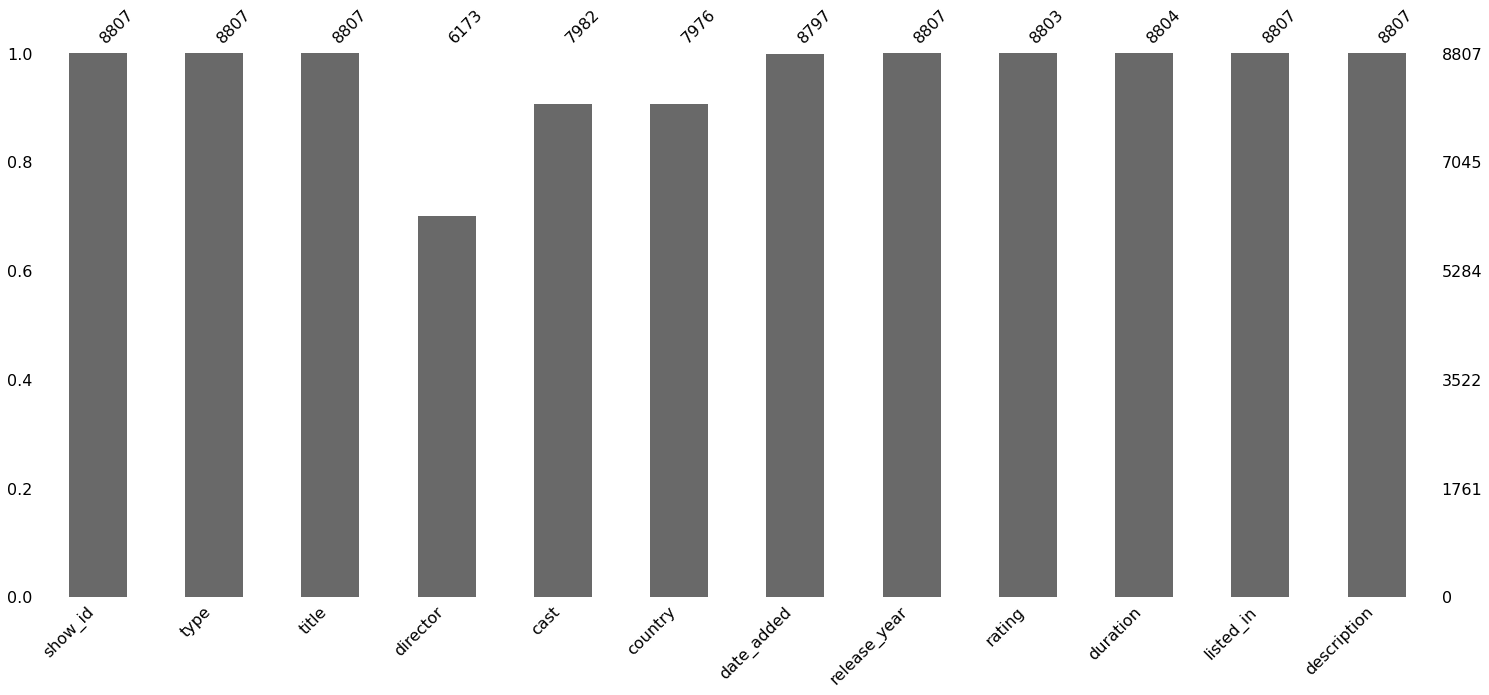

In [205]:
# missingno 라이브러리를 이용해 시각화 해 봅시다! 
msno.bar(netflix)

* missingno 라이브러리를 이용해 데이터셋의 결측치를 한번에 확인할 수 있었습니다. 
* 결측치가 있는 column(열)은 director, cast, country이다. 수치로 확인 해 보겠습니다. 

In [206]:
# 수치로 확인해 보는 결측치
netflix.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

| 열 | 결측치 개수 |
| --- | --- |
| director | 2634 |
| country | 831 |
| cast | 825 |
| date_added | 10 |
| rating | 4 |
| duration | 3 |


* 생각보다 많은 결측치가 있음을 확인 할 수 있었다. 이렇게 확인 된 결측치는 
    1. 결측치가 있는 행을 삭제한다
    2. 결측치가 있는 행에 임의의 값을 기입한다   
위와 같은 방법으로 처리 해 줄 수 있는데, 이번 프로젝트에선 __결측치가 있는 행에 임의의 값을 붙여 넣어 줍니다.__

## &nbsp;&nbsp; 3-2 결측치 처리하기 


* 3-1에서 확인한 결측치에 임의의 값을 채워주겠습니다. 
*  DataFrame에서 결측값을 원하는 값으로 변경하는 메서드인 `fillna`을 이용해, 각 컬럼마다 원하는 값을 채워넣겠습니다. 

In [207]:
netflix.fillna({"director": "Uncredited", "cast": "Uncredited", "country": "NA",
                      "date_added": "NA", "rating":"Not Rated", "duration":0},inplace= True )

In [208]:
# fillna 처리 후, 결측치가 있는 지 다시한번 확인합니다. 
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## &nbsp;&nbsp; 3-3 잘못된 데이터 항목 수정하기


* 잘못 들어간 데이터가 있는지 확인하는 작업을 Pandas의 메소드를 이용해 확인 해보면 좋겠지만, 도저히 방법이 떠오르지않아 엑셀의 힘을 빌어 찾아내보았습니다. 
* 각 columns 에 포함되어 있는 값을 엑셀의 필터 기능을 이용해 확인 해 본 다음, `value_counts()` 메소드로 한번 더 확인해 보겠습니다.

### &nbsp;&nbsp;&nbsp;&nbsp; 3-3-1  잘못된 데이터 항목 확인해보기 


* 엑셀의 필터 기능을 이용해, `rating` 과 `duration`의 데이터 항목을 확인 해보겠습니다.
    * 문자열 데이터 중, 특정 범위가 지정된 행은 위 두 행밖에 없기 때문에 확인해 보았습니다.  

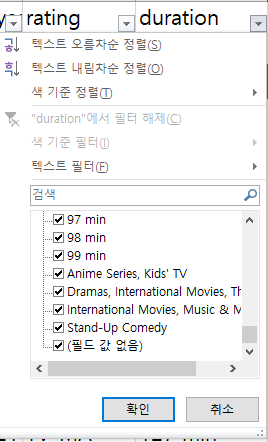  

* `duration` 의 경우, **영화 데이터일 경우 ~min** , *Tv show 데이터일 경우엔 Season, Seasons* 로 끝나는게 대부분인데, 
  `listed_in` 항목에 들어가야할 데이터가 잘못 들어가 있는걸 확인 할 수 있었다. 

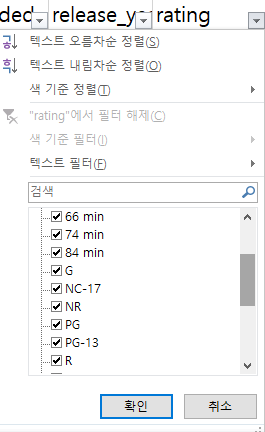  


* `rating` 의 경우엔 미국에서 사용되고 있는 영상물 심의 등급이 기재되있는 열인데, 심의 등급 이외에 `duration`에 들어가 있어야 할 min, Seasons 행이 있는것을 확인 할 수 있었다.

### 참고! rating?

- 영화/쇼의 영상물 심의 등급 이 기재된 column. 
- 한국 연령대에 맞게 수정 해 보는것도 생각 할 수 있겠지만, 연령대 구분이 다르고, 미국이 조금 더 세분화 되어 있기 때문에 따로 한국에 맞게 변환해 주는 작업은 하지 않았습니다. 각 심의 등급에 대한 설명은 아래 그림을 참고 해 주세요! 
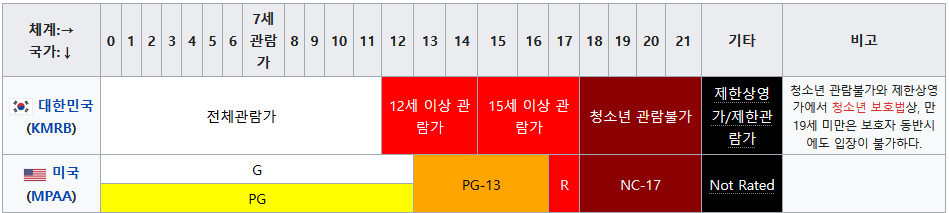  
[출처](https://ko.wikipedia.org/wiki/영상물_등급_제도)

* `value_counts()` 메소드를 이용해 한번 더 확인 해보자. 
* duration의 경우, 항목수가 많아 엑셀에서 필터링 작업을 거쳐, show_id로 행 데이터를 확인했습니다. 
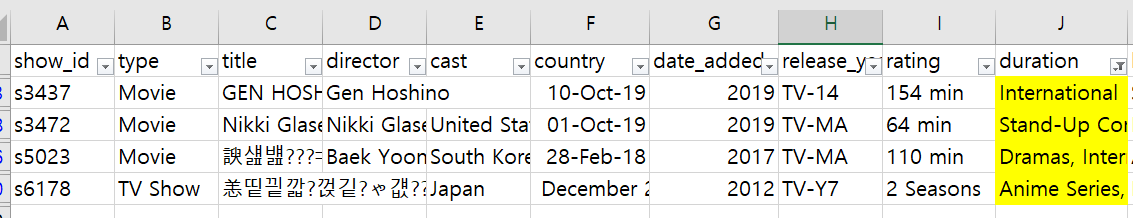

In [209]:
netflix[netflix["show_id"].isin(["s3437"])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3436,s3437,Movie,GEN HOSHINO STADIUM TOUR âPOP VIRUSâ,Naoto Amazutsumi,Gen Hoshino,NA,"October 10, 2019",2019,TV-14,154 min,"International Movies, Music & Musicals",Singer-songwriter Gen Hoshino takes the stage ...


In [210]:
netflix[netflix["show_id"].isin(["s3472"])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3471,s3472,Movie,Nikki Glaser: Banginâ,Nicholaus Goossen,Nikki Glaser,United States,"October 1, 2019",2019,TV-MA,64 min,Stand-Up Comedy,Nikki Glaser bares all in a blistering stand-u...


In [211]:
netflix[netflix["show_id"].isin(["s5023"])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5022,s5023,Movie,ë°ëì ì¡ëë¤,Hong-seon Kim,Baek Yoon-sik,South Korea,"February 28, 2018",2017,TV-MA,110 min,"Dramas, International Movies, Thrillers",After people in his town start turning up dead...


In [212]:
netflix[netflix["show_id"].isin(["s6178"])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6177,s6178,TV Show,å¿è ããããªãã,Uncredited,Uncredited,Japan,"December 23, 2018",2012,TV-Y7,2 Seasons,"Anime Series, Kids' TV","Hailing from the mountains of Iga, Kanzo Hatto..."


* duration 에 잘못 기재된 부분은 각 행을 불러와 확인 해본 결과, 값이 제대로 들어가 있음을 확인 할 수 있었다. 
* 꼭 엑셀에서 확인 한 부분이 파이썬이나 주피터 노트북으로 불러왔을 때, 잘못 표기 되지 않았을 수도 있기 때문에, 한번 더 확인 해주는 작업이 필요한 것 같다. 

In [213]:
# rating도 확인 해 보겠습니다.
netflix['rating'].value_counts()

TV-MA        3207
TV-14        2160
TV-PG         863
R             799
PG-13         490
TV-Y7         334
TV-Y          307
PG            287
TV-G          220
NR             80
G              41
TV-Y7-FV        6
Not Rated       4
NC-17           3
UR              3
74 min          1
84 min          1
66 min          1
Name: rating, dtype: int64

* `duration`의 경우 처럼, 엑셀에서 확인한 부분이 전부 나타난 것은 아니지만, 잘못 들어간 부분이 3가지나 있단 것을 확인할 수 있습니다. 
* `rating` 을 `NR`로 수정해 주고,`duration` 란에 `74 min, 84 min, 66 min` 로 변경 해 줍니다.

In [214]:
# 해당 값이 있는지 확인 
netflix[netflix["rating"].isin(["74 min","84 min","66 min"])] 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,0,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,0,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,0,Movies,The comic puts his trademark hilarious/thought...


In [215]:
# rating 에 있는 "74 min","84 min","66 min" 를 `NR` 로 바꿔줍니다. 
netflix["rating"].replace(["74 min","84 min","66 min"], "NR", inplace= True)

In [216]:
# index 5541,5794,5813 에 해당하는 duration 열의 값을 각각 "74 min","84 min","66 min"로 채워넣습니다. 
netflix.loc[[5541,5794,5813],"duration"]=["74 min","84 min","66 min"]

* 해당 행을 불러와, 원하는데로 수정되었는지 확인 해 볼 수 있습니다. 

In [217]:
netflix.loc[[5541,5794,5813]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NR,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NR,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NR,66 min,Movies,The comic puts his trademark hilarious/thought...


## &nbsp;&nbsp; 3-4 `rating` 을 좀 더 보기쉽게! 


* kaggle EDA 중, rating이 좀 더 보기쉽게 전처리 되어있는 자료가 있어, 적용 해 보기로 합니다. 
* 이를 통해, 시각 화 했을 때나 데이터 프레임을 확인 했을 때, 훨씬 와닿기 좋을 것이다. 

In [218]:
# 우선, rating의 고유값을 가져와 확인 해 봅니다. 
netflix.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'Not Rated', 'TV-Y7-FV', 'UR'],
      dtype=object)

In [219]:
# 그 다음, replace 메소드를 이용해 보기 쉬운 형태로 바꿔줍니다. 
netflix['rating'].replace({
    'PG-13':'Above 13 years', 
    'TV-MA':'Adult',
    'PG': 'Parental Guidance:Kids',
    'TV-14':'Above 13 years',
    'TV-PG':'Parental Guidance:Kids',
    'TV-Y': 'Kids',
    'TV-Y7': 'Kids above 7 years',
    'R': 'Adult',
    'TV-G':'Kids',
    'G':'Kids',
    'NC-17':'Adult',
    'UR':'Unrated',
    'NR':'Unrated',
    'TV-Y7-FV':'Kids above 7 years'
},inplace=True)

In [220]:
# 잘 바꼈는지 확인 해봅니다. 
netflix.rating.unique()

array(['Above 13 years', 'Adult', 'Parental Guidance:Kids', 'Kids',
       'Kids above 7 years', 'Unrated', 'Not Rated'], dtype=object)

---

# 4. Netflix 데이터 시각화 하기


* 다음의 내용을 시각화해서 확인 해 보겠습니다.
    1. `type` 에 해당하는  `Movies & TV Shows` 총 개수
    2. `Movies 와 TV Shows`의 장르 분포 
    3. `ratings` 분포 
    4. 서비스 하는 영화와 tv쇼의 개봉일자
    5. 영화들의 러닝타임 분포
    6. 가장 많은 Tv Show 의 season 수는? 
    7. 작품들의 제작된 국가 분포
    8. Seaborn으로 확인해 보는 이변량 분석 

## &nbsp;&nbsp; 4-1. `type` 에 해당하는  `Movies & TV Shows` 총 개수


* 넷플릭스 데이터셋의 Movies 와 TV Shows 의 컨텐츠 개수를 확인 해 보겠습니다. 

In [221]:
# type의 유니크한 컬럼을 확인 
netflix["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [222]:
# 컬럼 값에 해당하는 데이터의 수량 체크 
netflix["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [223]:
# 시각화를 위해 dataframe 형태로 출력! 
content_type = netflix['type'].value_counts().to_frame(name="count")
content_type

,count
Movie,6131
TV Show,2676


In [224]:
# 시각화 툴로 나타내봅시다 
# pie chart 
pie = ctc.Pie('Content type on Netflix', # title
              width='720px',height='720px')

# set the chart options
pie.set_options(labels=list(content_type.index), # country names as labels
                inner_radius=0,                  # inner radius set to 0
                colors=['#abcfe9','#dfc3fd'])

# label to be shown on graph
pie.add_series(list(content_type['count'])) 

# display the charts
pie.render_notebook()

* 넷플릭스 데이터셋에는 Tv Show 보단 영화 수량이 많은것을 확인 할 수 있다. 


## &nbsp;&nbsp; 4-2. `Movies 와 TV Shows`의 장르 분포 


* 넷플릭스 데이터셋의 장르를 확인 해 봅니다. 서비스 하는 영상 중, 가장 많은 장르는 `Dramas, International Movies`, 그 뒤를 따르는게 `Documentaries`, `Stand-Up Comedy`를 차지했다. 

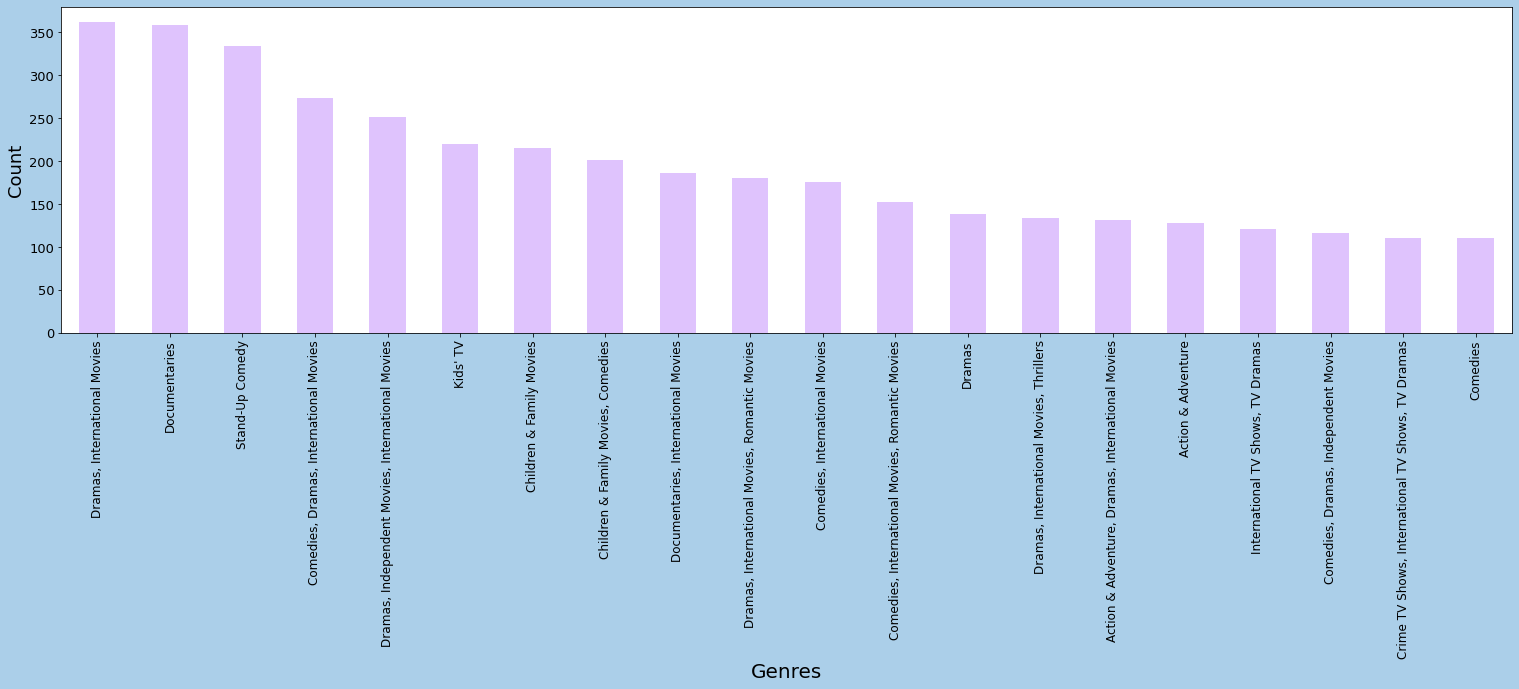

In [225]:
plt.figure(figsize=(26,6),facecolor="#abcfe9")
plt.axes().set_facecolor("white")
netflix["listed_in"].value_counts().head(20).plot(kind="bar",color ="#dfc3fd")
plt.xlabel("Genres",fontsize=20)
plt.ylabel("Count",fontsize=18)
plt.xticks(fontsize= 12 )
plt.yticks(fontsize= 13 );

## &nbsp;&nbsp; 4-3. `ratings` 분포 


* 영화와 Tv Show로 나눠봤으니, 서비스하는 영상들의 등급도 시각화로 확인 해봅니다. 
* 3-4에서 전처리 과정을 거쳤기 때문에, 눈으로 확인하기 쉬워졌다. 

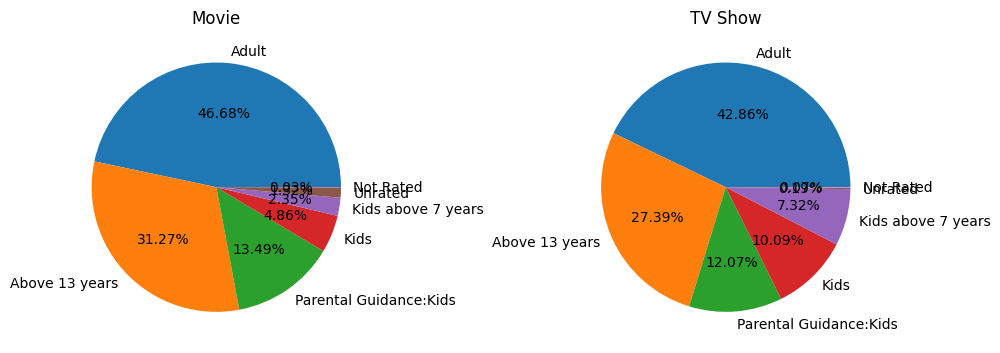

In [226]:
netflix_count=pd.DataFrame(netflix['rating'].value_counts())
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,6),dpi=100)
axes[0].pie(netflix['rating'][netflix.type=='Movie'].value_counts(),labels=netflix_count.index,autopct='%1.2f%%' )
axes[0].set_title('Movie')
axes[1].pie(netflix['rating'][netflix.type=='TV Show'].value_counts(),labels=netflix_count.index,autopct='%1.2f%%' )
axes[1].set_title('TV Show')
plt.tight_layout()
plt.show()

## &nbsp;&nbsp; 4-4. 서비스 하는 영화와 tv쇼의 개봉년도 


* `release_year` 항목에는 영화나 Tv_show의 개봉 및 출시 년도를 정보가 있습니다. 막대그래프 분포를 통해 년도별로 얼마나 많은 작품들이 개봉 및 출시되었는지 확인 해 봅니다. 대체로 2000년도 이후의 작품부터 많아져, 2018년도에 출시된 컨텐츠가 많은것을 알 수 있습니다. 이를 통해 넷플릭스에서 서비스하고 있는 컨텐츠가 얼마나 최신인지 확인 해 볼 수 있습니다.  


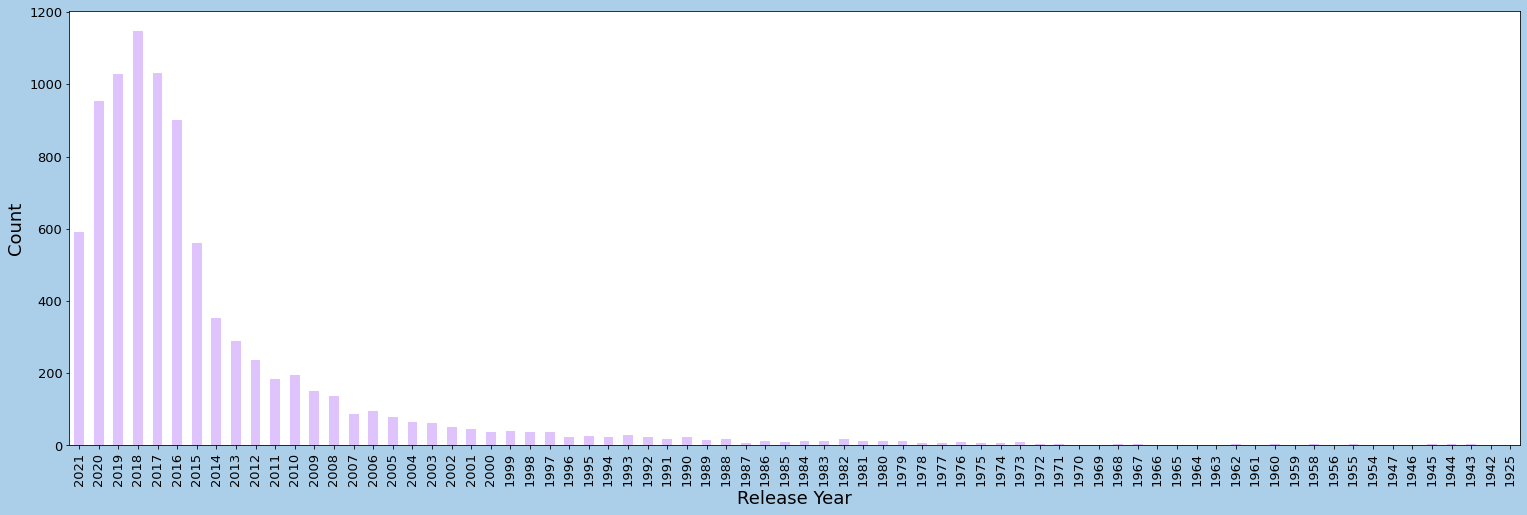

In [227]:

release_count=pd.DataFrame(netflix['release_year'].value_counts())
plt.figure(figsize=(26,8),facecolor="#abcfe9")
plt.axes().set_facecolor("white")
netflix["release_year"].value_counts().sort_index(ascending=False).plot(kind="bar",color ="#dfc3fd")
plt.xlabel("Release Year",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.xticks(fontsize= 13 )
plt.yticks(fontsize= 13 );

* 조금 더 보기 쉽게 TV show와 Movie로 나누어 확인 해 봅시다. 

In [228]:
netflix.groupby(["release_year","type"]).count().sort_values(by="release_year",ascending =False)[:20]["show_id"]

release_year  type   
2021          TV Show    315
              Movie      277
2020          TV Show    436
              Movie      517
2019          TV Show    397
              Movie      633
2018          TV Show    380
              Movie      767
2017          TV Show    265
              Movie      767
2016          TV Show    244
              Movie      658
2015          TV Show    162
              Movie      398
2014          TV Show     88
              Movie      264
2013          TV Show     63
              Movie      225
2012          TV Show     64
              Movie      173
Name: show_id, dtype: int64

## &nbsp;&nbsp; 4-5. 영화들의 러닝타임 분포


* 서비스하는 영화의 러닝타임을 확인 해봅니다. 

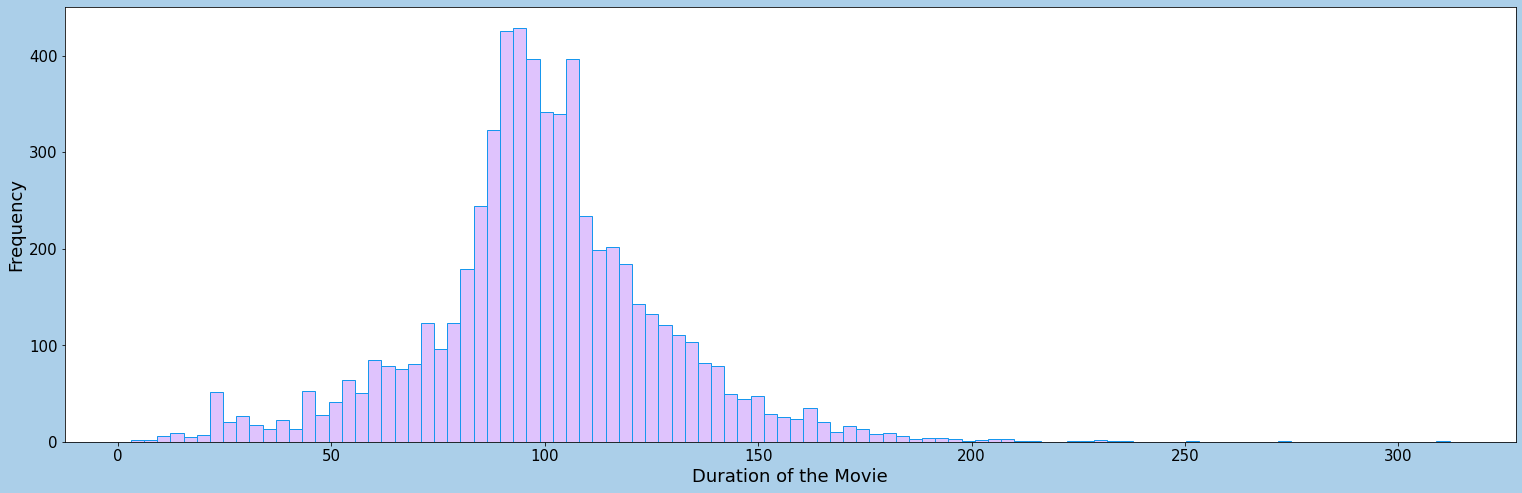

In [229]:
plt.figure(figsize=(26,8),facecolor="#abcfe9")
plt.axes().set_facecolor("white")
netflix[netflix["type"]=="Movie"]["duration"].str.split(" ", expand= True)[0].astype(float).plot(kind="hist",color ="#dfc3fd",edgecolor ="#1697ee",bins=100)
plt.xlabel("Duration of the Movie",fontsize=18)
plt.ylabel("Frequency",fontsize=18)
plt.xticks(fontsize= 15 )
plt.yticks(fontsize= 15 );

## &nbsp;&nbsp; 4-6. 가장 많은 Tv Show 의 season 수는? 


* 서비스하고 있는 Tvshow 컨텐츠들의 season이 얼마나 많은지 확인 해 보겠습니다. 
* 가장 많은 시즌은 어떤 작품일까요?

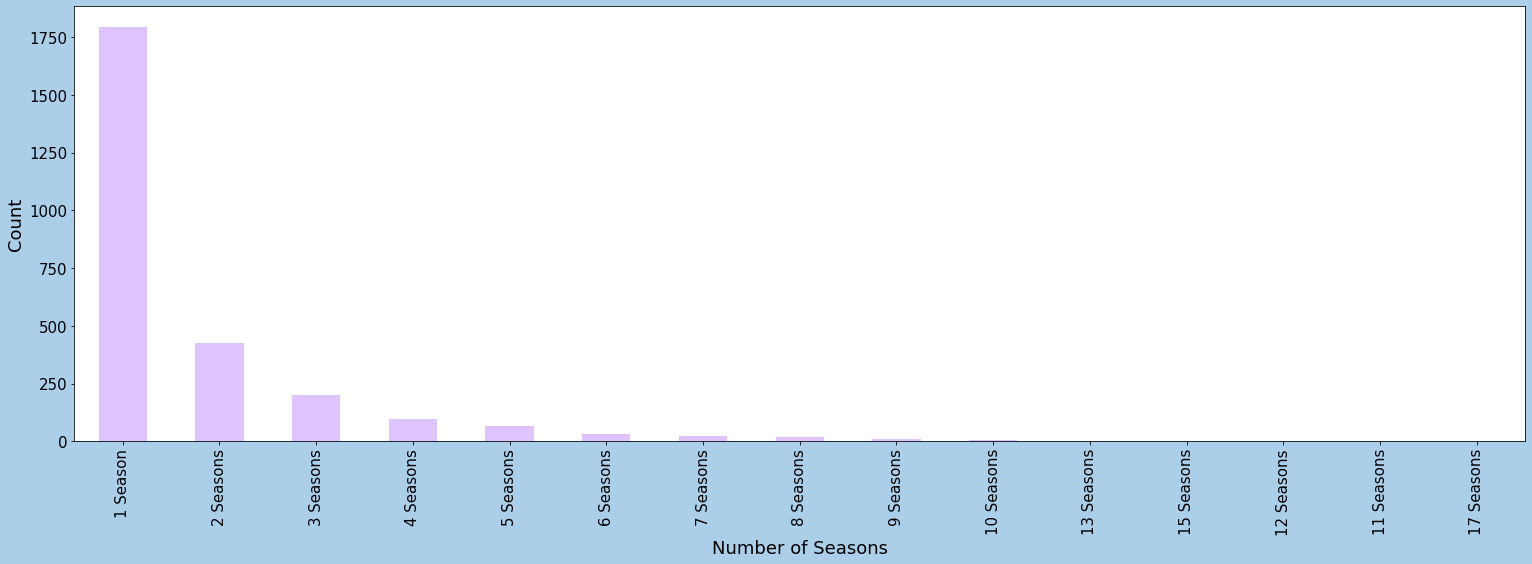

In [230]:
plt.figure(figsize=(26,8),facecolor="#abcfe9")
plt.axes().set_facecolor("white")
netflix[netflix["type"]=="TV Show"]["duration"].value_counts().plot(kind="bar",color ="#dfc3fd")
plt.xlabel("Number of Seasons",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.xticks(fontsize= 15 )
plt.yticks(fontsize= 15 );

* 그래프의 항목으로, 적게는 1시즌 부터 많게는 17시즌까지 있는 시리즈도 있다는걸 확인할 수 있었다. 
* 가장 많은 seasons을 서비스하고 있는 tv 프로그램은 그레이 아나토미 였다. 

In [231]:
# season 10 이상인 항목을 duration에서 확인 해봅니다.
netflix[netflix["duration"].isin(['10 Seasons','13 Seasons', '15 Seasons', '12 Seasons', '11 Seasons', '17 Seasons'])][["title","duration"]].sort_values("duration", ascending= False)

,title,duration
548,Grey's Anatomy,17 Seasons
4798,NCIS,15 Seasons
2423,Supernatural,15 Seasons
4220,COMEDIANS of the world,13 Seasons
7847,Red vs. Blue,13 Seasons
1354,Heartland,13 Seasons
4964,Trailer Park Boys,12 Seasons
5412,Criminal Minds,12 Seasons
6456,Cheers,11 Seasons
6795,Frasier,11 Seasons


## &nbsp;&nbsp; 4-7. 작품들의 제작된 국가 분포


* `country` 컬럼을 통해, 넷플릭스에서 서비스 하고있는 컨텐츠들이 만들어진 국가를 확인 해 볼 수 있다. 

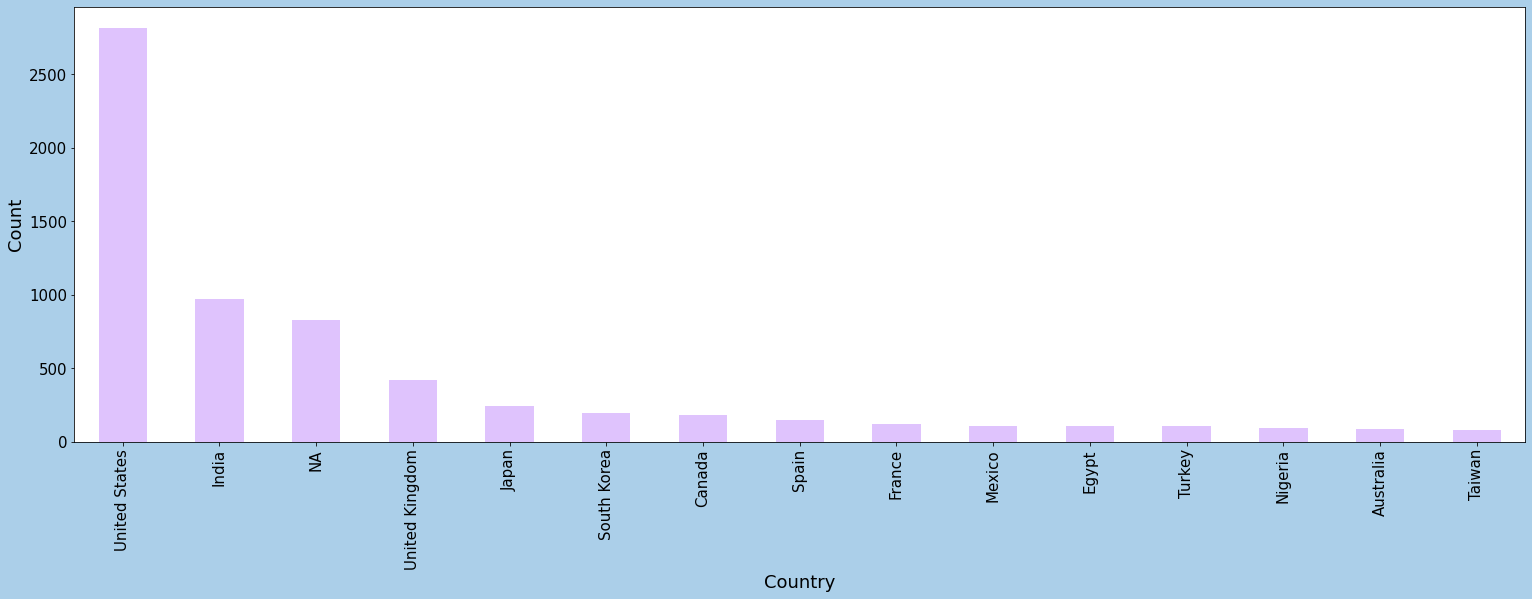

In [232]:
plt.figure(figsize=(26,8),facecolor="#abcfe9")
plt.axes().set_facecolor("white")
netflix["country"].value_counts().head(15).plot(kind="bar",color ="#dfc3fd")
plt.xlabel("Country",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.xticks(fontsize= 15 )
plt.yticks(fontsize= 15 );

In [233]:
# 가장 많은 나라 best 10을 뽑아보고, 수량도 함께 확인 해봅시다. 
country = netflix['country'].value_counts()[:10].to_frame(name="count")
country

,count
United States,2818
India,972
NA,831
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


In [234]:
# 시각화 해보면 더 확 와닿겠죠?
pie = ctc.Pie('Countries with Most Content',
              width='720px',height='720px')

# set the chart options
pie.set_options(labels=list(country.index), # country names as labels
                inner_radius=0.45    # inner radius set between 0 & 1
                )
pie.add_series(list(country['count'])) 

# display the chart
pie.render_notebook()

## &nbsp;&nbsp; 4-8. Seaborn으로 확인해 보는 이변량 분석 



* 이변량이란 두가지 수치로 나타내는 자료를 뜻한다. 서비스하고있는 tv show와 영화의 영상물 등급 분포를  Seaborn 시각화 툴을 이용해 이변량으로 확인 해볼 수 있습니다. 
* tv show, movie 두 항목 다 어른용 컨텐츠가 많아, 어린 연령 대상으론 적합하지 않다고 얘기 해 볼 수도 있겠다.  

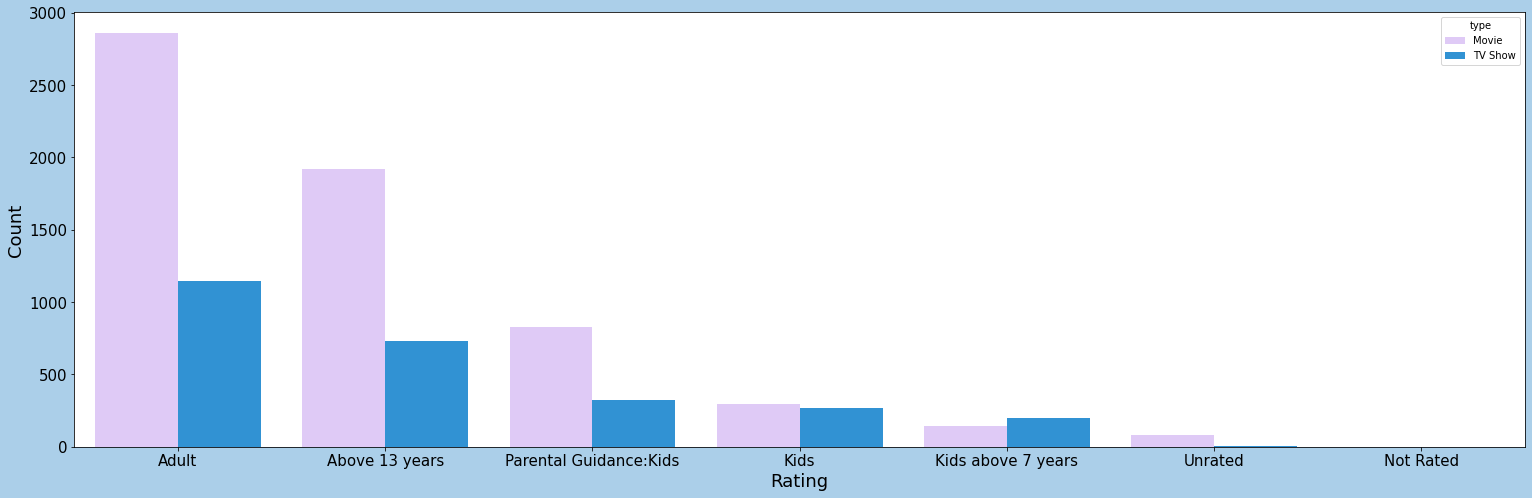

In [235]:
plt.figure(figsize=(26,8),facecolor="#abcfe9")
plt.axes().set_facecolor("white")
sns.countplot(data=netflix, x= "rating", hue ="type", palette=["#dfc3fd", "#1697ee"], order=netflix["rating"].value_counts().index[:10] )
plt.xlabel("Rating",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.xticks(fontsize= 15 )
plt.yticks(fontsize= 15 );

* 출시 연도에 따른 tv show와 영화도 시각화로 알아볼 수 있다. 

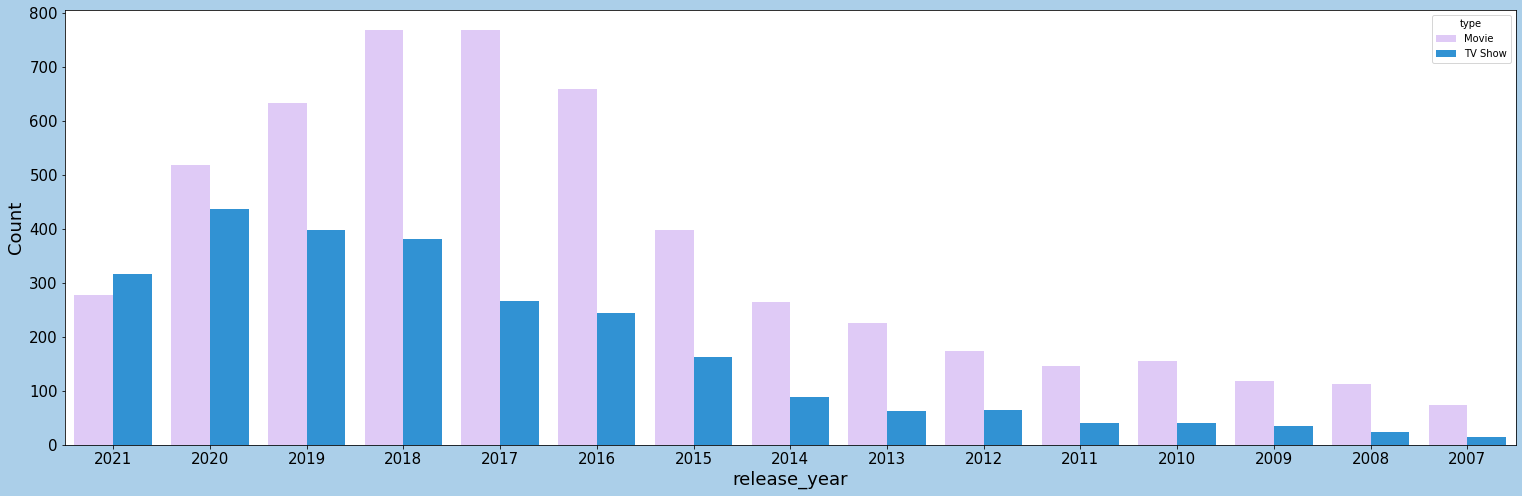

In [236]:
plt.figure(figsize=(26,8),facecolor="#abcfe9")
plt.axes().set_facecolor("white")
sns.countplot(data=netflix, x= "release_year", hue ="type", palette=["#dfc3fd", "#1697ee"],order=netflix["release_year"].value_counts().index.sort_values(ascending=False)[:15])
plt.xlabel("release_year",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.xticks(fontsize= 15 )
plt.yticks(fontsize= 15 );

* 이렇게 데이터를 불러와서 전처리 하고 시각화 툴을 통해 데이터를 확인 해 보는 작업을 거쳤다. 
* Amazon_prime 데이터도 똑같이 전처리를 거쳐 시각화로 데이터를 확인 해 봅니다. 
* 반복되는 작업인 만큼, 모듈화가 가능한 부분이라면 모듈화를 진행해 보겠습니다. 





----


# 5. Amazon Prime 데이터 살펴보기

* pd.read_csv 를 통해 읽어온 아마존 프라임 데이터에 대해 알아보기 위해 
  1. 전반적인 정보를 확인,
  2. 포함된 행 제목을 확인
  3. 숫자열 데이터의 통계량을 확인 해봅니다. 
  4. transpose 를 통해 총 수량과 유니크 수량등을 보기 쉽게 해 줍니다. 

In [237]:
# 전반적인 정보를 확인합니다!
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [238]:
# 데이터셋에 포함된 행 제목을 확인
amazon.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

* colums의 명칭은 넷플릭스 데이터와 동일합니다. 

In [239]:
# 숫자열 데이터의 통계량을 확인 해봅니다. 
amazon.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


* 위 통계량으로 아마존 데이터셋에 있는 영화/쇼가 **가장 오래된 년도는 1920년**, **가장 최근년도는 2021년** 임을 알 수 있다.
    (본 데이터는 2021년 기준의 데이터셋 입니다.)

* 각 columns의 데이터 수량과, 고유값을 `describe`를 통해 나타내었고,   
  컬럼 정보를 `transpose`를 통해 오른쪽으로 둬 보기 쉽게 처리하였습니다. 

In [240]:
amazon.describe(include='object').transpose()

,count,unique,top,freq
show_id,9668,9668,s1,1
type,9668,2,Movie,7814
title,9668,9668,The Grand Seduction,1
director,7586,5774,Mark Knight,113
cast,8435,7927,Maggie Binkley,56
country,672,86,United States,253
date_added,155,84,"March 30, 2021",14
rating,9331,24,13+,2117
duration,9668,219,1 Season,1342
listed_in,9668,518,Drama,986


----

# 6. Amazon Prime 데이터 전처리하기 


* 넷플릭스 데이터와 동일하게 데이터셋을 목적에 맞게 전처리 해 줍니다.
* 데이터셋에 결측치가 있는지 확인 해 보고, 결측치에 적절한 값을 추가해 결측치가 있는 행을 처리 해 줍니다.
* columns에 맞지 않는 데이터가 있는지 확인 해보고, 알맞은 값으로 바꿔주는 작업을 해 봅니다.

## &nbsp;&nbsp; 6-1 결측치 확인하기 


* 아마존 데이터도 결측치를 확인 해 봅니다. 아마존 데이터에도 결측치가 있을까요?

<AxesSubplot:>

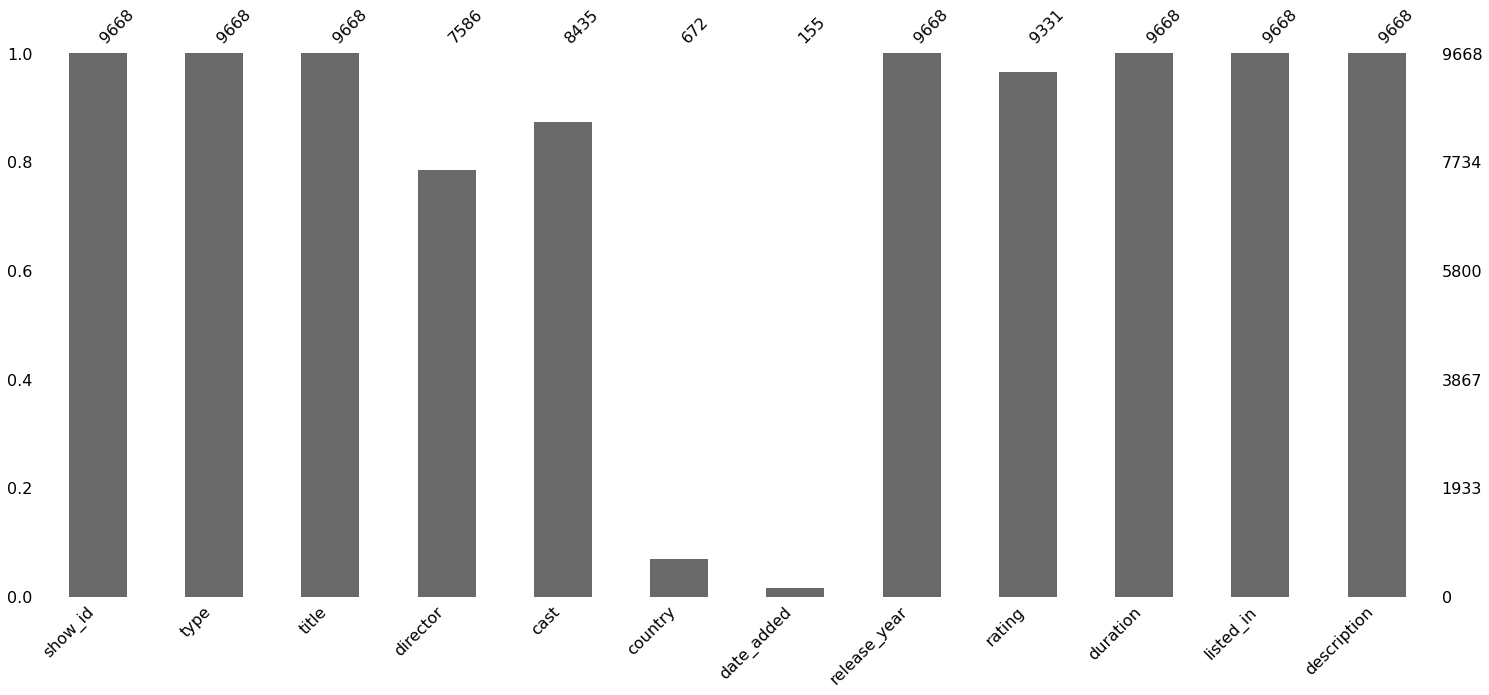

In [241]:
# missingno 라이브러리를 이용해 시각화 해 봅시다! 
msno.bar(amazon)

* 넷플릭스 데이터에 비해 엄청난 결측치를 확인할 수 있었다. 수치 데이터로도 확인 해 볼까요?

In [242]:
# 수치로 확인해 보는 결측치
amazon.isnull().sum().sort_values(ascending=False)

date_added      9513
country         8996
director        2082
cast            1233
rating           337
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

## &nbsp;&nbsp; 6-2 결측치 처리하기 


* 수치로 확인 해보니 `date_added `와 `country` 의 결측치가 엄청났다. 특정 값으로 채워줘도 의미가 없을 것 같아 과감하게 없애주기로 합니다. 
* 그에 비해 결측치 수량이 적은 `director`, `cast`, `rating `에는 특정 값을 추가 해 주기로 합니다. 

In [243]:
# 열 삭제 
amazon.drop('date_added', axis=1, inplace=True )

In [244]:
amazon.drop('country', axis=1, inplace=True )

In [245]:
# 잘 삭제 됬는지 확인 
amazon.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

* 결측치가 많은 데이터 항목이 잘 삭제되었다. 나머지 결측치 있는 항목에 임의의 값을 넣어준다. 

In [246]:
amazon.fillna({"director": "Uncredited", "cast": "Uncredited", 
               "rating":"Not Rated", "duration":0},inplace= True )

In [247]:
amazon.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

* 결측치가 잘 처리되었다! 

## &nbsp;&nbsp; 6-3 잘못된 데이터 항목 수정하기


* 넷플릭스와 동일한 방법으로 `rating` 과 `duration`의 데이터 항목을 확인 해보겠습니다. 

### &nbsp;&nbsp; &nbsp;&nbsp; 6-3-1 rating 확인! 


* 넷플릭스 데이터와는 다르게, rating의 표기 방법이 같은 점도 있지만 다르게 표기된 부분도 많았다.   
  3-4 과정에서 진행해 줬던 것 처럼, rating을 조금 더 보기 쉽고 간결하게 바꿔보는 작업도 함께 해 주겠습니다. 

In [248]:
# 변경 전, 항목 및 수량 확인 
amazon['rating'].value_counts()

13+          2117
16+          1547
ALL          1268
18+          1243
R            1010
PG-13         393
7+            385
Not Rated     337
PG            253
NR            223
TV-14         208
TV-PG         169
TV-NR         105
G              93
TV-G           81
TV-MA          77
TV-Y           74
TV-Y7          39
UNRATED        33
NC-17           3
AGES_18_        3
NOT_RATE        3
AGES_16_        2
16              1
ALL_AGES        1
Name: rating, dtype: int64

In [249]:
# 그 다음, replace 메소드를 이용해 보기 쉬운 형태로 바꿔줍니다. 
amazon['rating'].replace({
    '13+':'Above 13 years',
    '16+': 'Adult',
    'ALL': 'Kids',
    '18+': 'Adult',
    '7+':'Kids above 7 years', 
    'Not Rated': 'Unrated',
    'TV-NR': 'Unrated',
    'UNRATED': 'Unrated',
    'AGES_18_': 'Adult',
    'NOT_RATE':'Unrated',
    'AGES_16_': 'Adult',
    '16': 'Adult',
    'ALL_AGES': 'Kids',
    'PG-13':'Above 13 years', 
    'TV-MA':'Adult',
    'PG': 'Parental Guidance:Kids',
    'TV-14':'Above 13 years',
    'TV-PG':'Parental Guidance:Kids',
    'TV-Y': 'Kids',
    'TV-Y7': 'Kids above 7 years',
    'R': 'Adult',
    'TV-G':'Kids',
    'G':'Kids',
    'NC-17':'Adult',
    'UR':'Unrated',
    'NR':'Unrated',
    'TV-Y7-FV':'Kids above 7 years'
},inplace=True)

In [250]:
# 잘 바꼈는지 확인 해봅니다. 
amazon.rating.unique()

array(['Unrated', 'Above 13 years', 'Kids', 'Adult', 'Kids above 7 years',
       'Parental Guidance:Kids'], dtype=object)




----




# 7. Amazon Prime 데이터 시각화 하기


* 넷플릭스와 동일하게 아마존 프라임의 데이터도 시각화 해 주겠습니다.
    1. `type` 에 해당하는  `Movies & TV Shows` 총 개수
    2. `Movies 와 TV Shows`의 장르 분포 
    3. `ratings` 분포 
    4. 서비스 하는 영화와 tv쇼의 개봉일자
    5. 영화들의 러닝타임 분포
    6. 가장 많은 Tv Show 의 season 수는? 
    7. 작품들의 제작된 국가 분포
    8. Seaborn으로 확인해 보는 이변량 분석 

## &nbsp;&nbsp; 7-1. `type` 에 해당하는  `Movies & TV Shows` 총 개수


* 아마존 프라임 데이터셋의 Movies 와 TV Shows 의 컨텐츠 개수를 확인 해 봅니다. 

In [251]:
# type의 유니크한 컬럼을 확인 
amazon["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [252]:
# 컬럼 값에 해당하는 데이터의 수량 체크 
amazon["type"].value_counts()

Movie      7814
TV Show    1854
Name: type, dtype: int64

In [253]:
# 시각화를 위해 dataframe 형태로 출력! 
amazon_type = amazon['type'].value_counts().to_frame(name="count")
amazon_type

,count
Movie,7814
TV Show,1854


In [254]:
# 시각화 툴로 나타내봅시다 
# pie chart 
pie = ctc.Pie('Content type on Netflix', # title
              width='720px',height='720px')

# set the chart options
pie.set_options(labels=list(content_type.index), # country names as labels
                inner_radius=0,                  # inner radius set to 0
                colors=['skyblue','#fff840'])

# label to be shown on graph
pie.add_series(list(content_type['count'])) 

# display the charts
pie.render_notebook()

* 아마존 데이터셋에서도 Tv Show 보단 영화 수량이 많은것을 확인 할 수 있다. 

## &nbsp;&nbsp; 7-2. `Movies 와 TV Shows`의 장르 분포 


* 아마존 프라임 데이터셋의 장르를 확인 해봅니다. 
  서비스하는 컨텐츠 중 가장 많은 장르는 `Drama`, `Comedy`이다. 

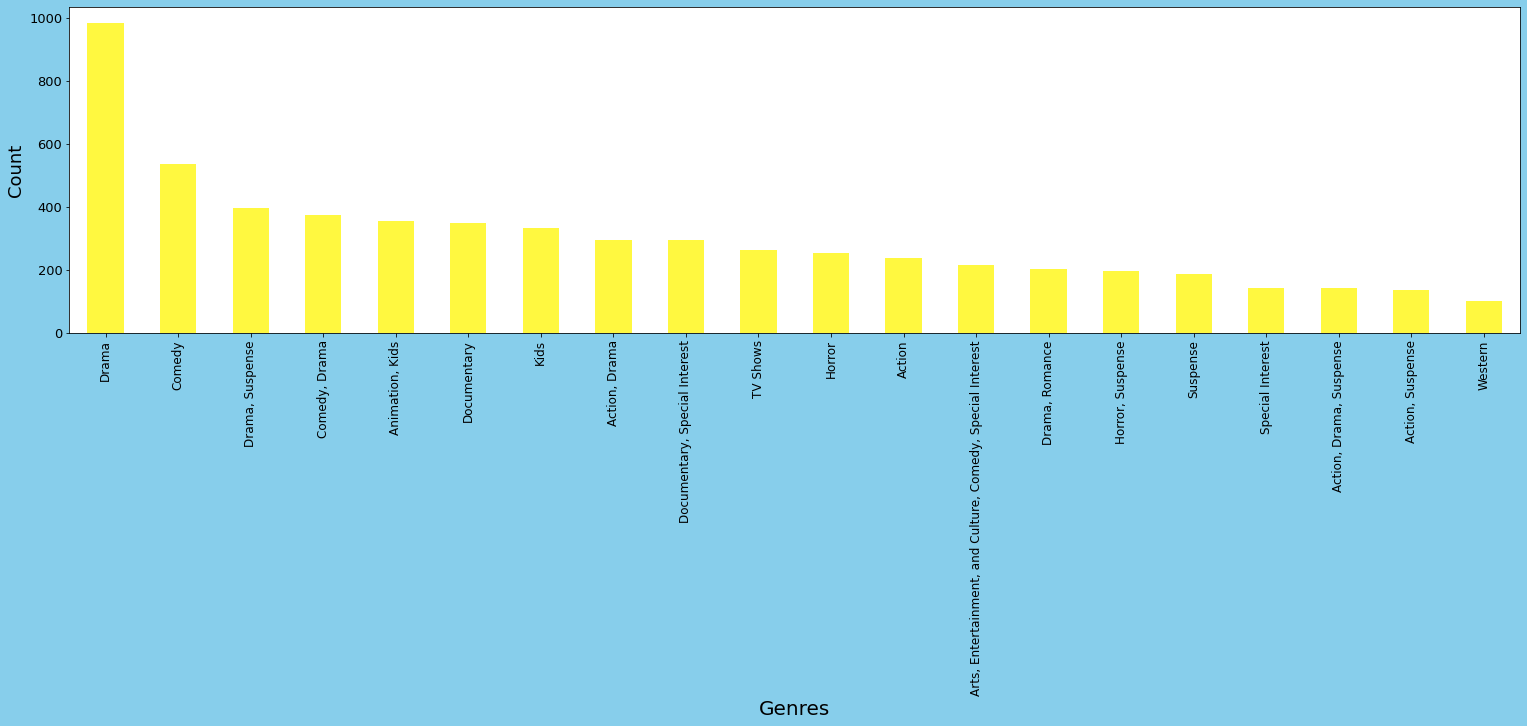

In [255]:
plt.figure(figsize=(26,6),facecolor="skyblue")
plt.axes().set_facecolor("white")
amazon["listed_in"].value_counts().head(20).plot(kind="bar",color ="#fff840")
plt.xlabel("Genres",fontsize=20)
plt.ylabel("Count",fontsize=18)
plt.xticks(fontsize= 12 )
plt.yticks(fontsize= 13 );

## &nbsp;&nbsp; 7-3. `ratings` 분포 


* 영화와 Tv Show로 나눠봤으니, 서비스하는 영상들의 등급도 시각화로 확인 해봅니다. 
* 3-4에서 전처리 과정을 거쳤기 때문에, 눈으로 확인하기 쉬워졌다. 

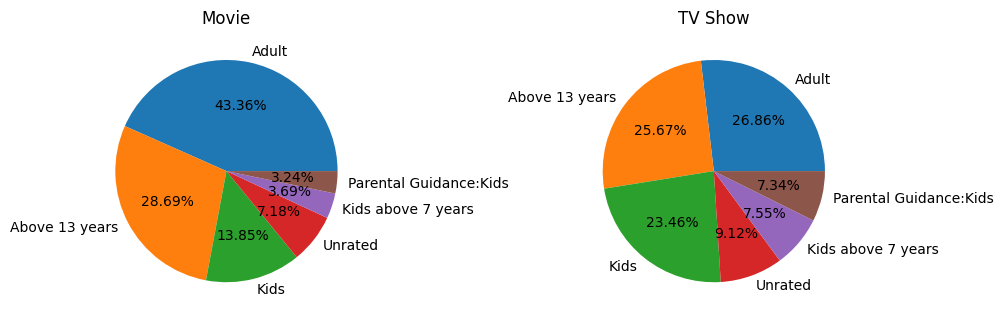

In [256]:
amazon_count=pd.DataFrame(amazon['rating'].value_counts())
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,6),dpi=100)
axes[0].pie(amazon['rating'][amazon.type=='Movie'].value_counts(),labels=amazon_count.index,autopct='%1.2f%%' )
axes[0].set_title('Movie')
axes[1].pie(amazon['rating'][amazon.type=='TV Show'].value_counts(),labels=amazon_count.index,autopct='%1.2f%%' )
axes[1].set_title('TV Show')
plt.tight_layout()
plt.show()

## &nbsp;&nbsp; 7-4. 서비스 하는 영화와 tv쇼의 개봉년도 


* 아마존 프라임에서 서비스하는 개봉 및 출시 년도도 확인 해 봅시다. 
* 넷플릭스에 비해 서비스하는 컨텐츠의 개봉년도가 다양한 점을 확인 해 볼 수 있다.

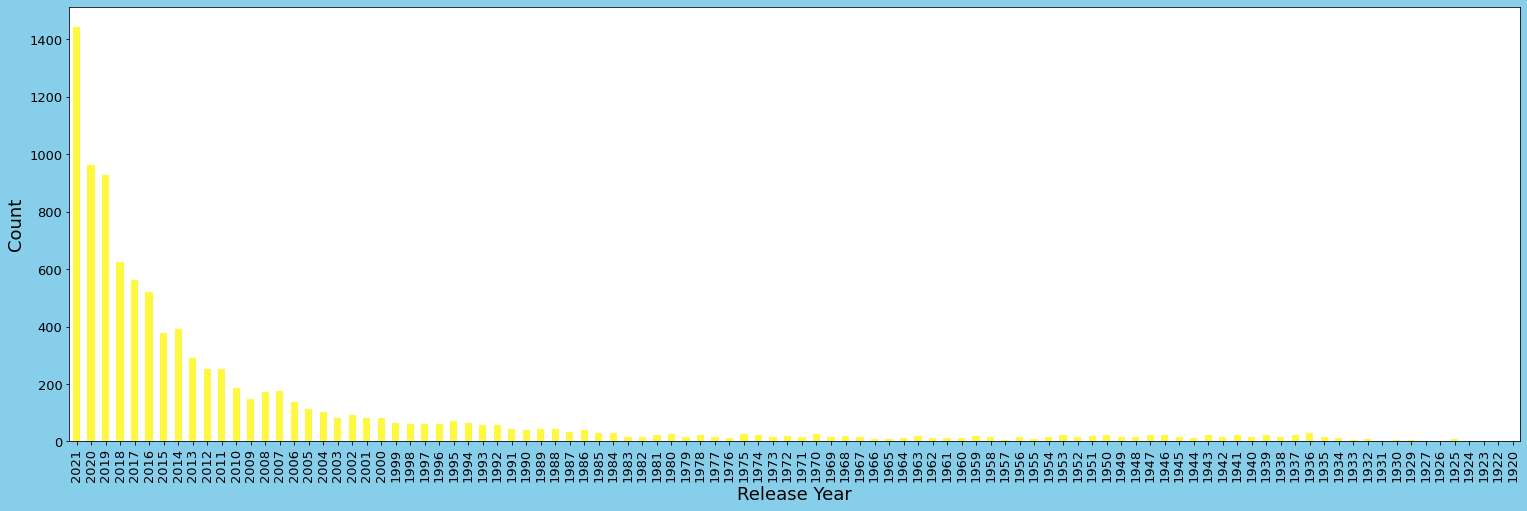

In [257]:
plt.figure(figsize=(26,8),facecolor="skyblue")
plt.axes().set_facecolor("white")
amazon["release_year"].value_counts().sort_index(ascending=False).plot(kind="bar",color ="#fff840")
plt.xlabel("Release Year",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.xticks(fontsize= 13 )
plt.yticks(fontsize= 13 );

* 넷플릭스와 마찬가지로 보기 쉽게 TV show와 Movie로 나누어 수치화 해서 확인 해 봅시다. 

In [258]:
amazon.groupby(["release_year","type"]).count().sort_values(by="release_year",ascending =False)[:20]["show_id"]

release_year  type   
2021          TV Show     303
              Movie      1139
2020          TV Show     226
              Movie       736
2019          TV Show     199
              Movie       730
2018          TV Show     185
              Movie       438
2017          Movie       404
              TV Show     158
2016          TV Show     119
              Movie       402
2015          TV Show      96
              Movie       282
2014          TV Show      96
              Movie       295
2013          TV Show      62
              Movie       227
2012          Movie       197
              TV Show      55
Name: show_id, dtype: int64

## &nbsp;&nbsp; 7-5. 영화들의 러닝타임 분포


* 서비스하는 영화의 러닝타임을 확인 해봅니다. 

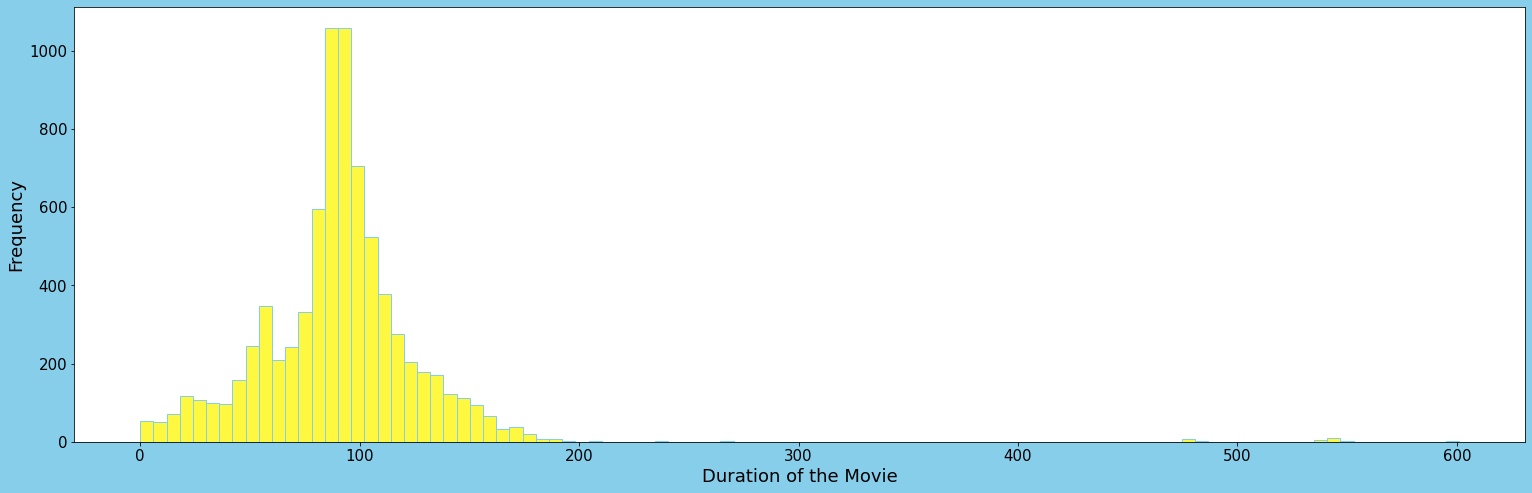

In [259]:
plt.figure(figsize=(26,8),facecolor="skyblue")
plt.axes().set_facecolor("white")
amazon[amazon["type"]=="Movie"]["duration"].str.split(" ", expand= True)[0].astype(float).plot(kind="hist",color ="#fff840",edgecolor ="skyblue",bins=100)
plt.xlabel("Duration of the Movie",fontsize=18)
plt.ylabel("Frequency",fontsize=18)
plt.xticks(fontsize= 15 )
plt.yticks(fontsize= 15 );

## &nbsp;&nbsp; 7-6. 가장 많은 Tv Show 의 season 수는? 


* 서비스하고 있는 Tvshow 컨텐츠들의 season이 얼마나 많은지 확인 해 보겠습니다. 

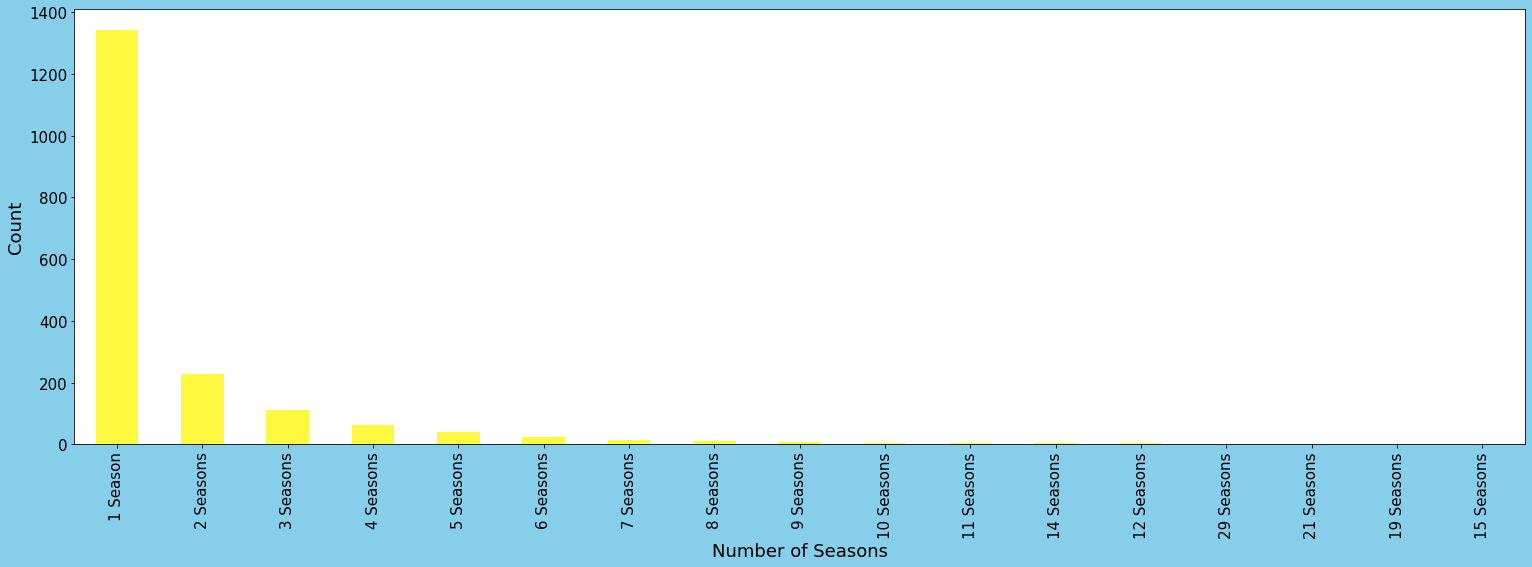

In [260]:
plt.figure(figsize=(26,8),facecolor="skyblue")
plt.axes().set_facecolor("white")
amazon[amazon["type"]=="TV Show"]["duration"].value_counts().plot(kind="bar",color ="#fff840")
plt.xlabel("Number of Seasons",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.xticks(fontsize= 15 )
plt.yticks(fontsize= 15 );

In [261]:
# season 10 이상인 항목을 duration에서 확인 해봅니다.
amazon[amazon["duration"].isin(['10 Seasons','11 Seasons','14 Seasons','12 Seasons','29 Seasons', '21 Seasons','15 Seasons', '19 Seasons'])][["title","duration"]].sort_values("duration", ascending= False)

,title,duration
770,The Amazing Race,29 Seasons
1007,Silent Witness,21 Seasons
840,Survivor,19 Seasons
8071,Top Gear (UK),15 Seasons
8977,My Magic Pet Morphle - Adventures of Mila & Mo...,14 Seasons
4125,Paula's Best Dishes,14 Seasons
3291,America's Next Top Model,14 Seasons
3005,Bones,12 Seasons
1358,Paula's Home Cooking,12 Seasons
9635,PokÃ©mon the Series: Diamond and Pearl,12 Seasons


## &nbsp;&nbsp; 7-7. 작품들의 제작된 국가 분포


* `country` 컬럼을 통해, 아마존에서 서비스 하고있는 컨텐츠들이 만들어진 국가를 확인 해 볼 수 있겠지만, 결측치가 너무 작아 컬럼을 삭제했기 때문에 넘어간다. 

## &nbsp;&nbsp; 7-8. Seaborn으로 확인해 보는 이변량 분석 




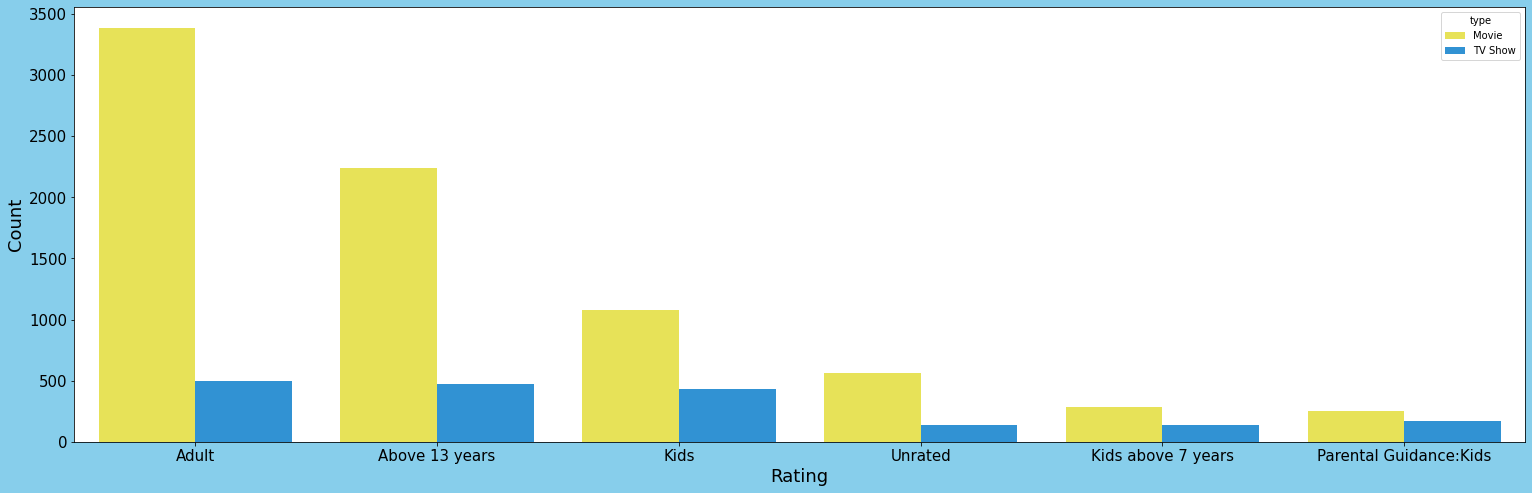

In [262]:
plt.figure(figsize=(26,8),facecolor="skyblue")
plt.axes().set_facecolor("white")
sns.countplot(data=amazon, x= "rating", hue ="type", palette=["#fff840", "#1697ee"], order=amazon["rating"].value_counts().index[:10] )
plt.xlabel("Rating",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.xticks(fontsize= 15 )
plt.yticks(fontsize= 15 );

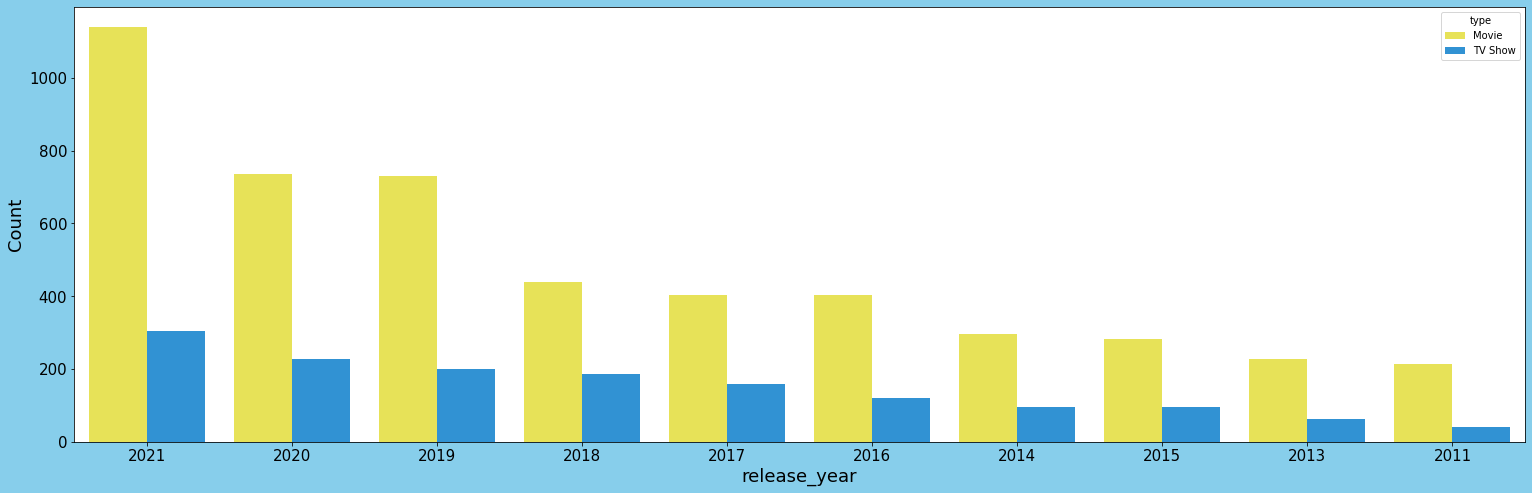

In [263]:
plt.figure(figsize=(26,8),facecolor="skyblue")
plt.axes().set_facecolor("white")
sns.countplot(data=amazon, x= "release_year", hue ="type", palette=["#fff840", "#1697ee"], order=amazon["release_year"].value_counts().index[:10] )
plt.xlabel("release_year",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.xticks(fontsize= 15 )
plt.yticks(fontsize= 15 );

---

# 회고!


### 어떻게 할까만 생각하지 말고 실천에 옮기기! 


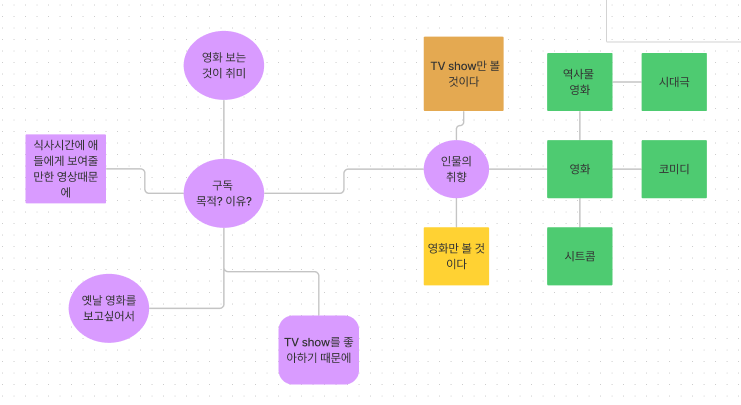  
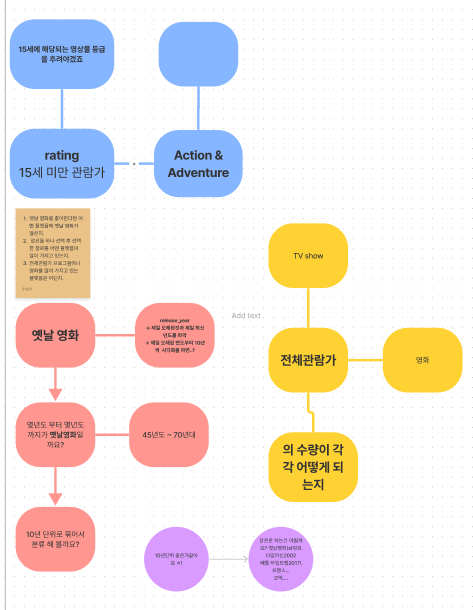
~~피그마에 정리했던 다양한 구상들.png~~
* 처음에 해 보고싶었던건 아마존과 넷플릭스, 두 ott 플랫폼 사이에서 고민하는 사람에게 정제하고 시각화 한 데이터를 보여주면서, 이 분이 원하는 취향과 매칭하여 보고서를 써보는것을 목표로 잡고 생각을 정리했었다. 하지만 이전보다 더 열심히 해야한단 생각에 생각만 많아져 시간 내로 완성하지 못할 것같아 밤을 거의 세버렸다. 우선 큰 틀과 전처리 과정만 우선적으로 정리했더라면, 지금보단 조금 더 다양한 시도를 해 볼 수 있었을 것이다. 또한 이번 데이터톤으로 팀원들과 소통하고, 협업하는 과정을 통해 몰랐던것, 처음 봤던 것들을 많이 학습 해 볼 수 있어서 좋았던것 같다:D 다들 너무너무 수고 많으셨어요!! 


* 팀원들끼리 프로젝트를 진행하게되어서 너무 즐거웟다 아직 내가 많이 부족한 부분도 알게되었다 팀원들에게 미안햇지만 어렵고 보람찬 일주일이었다!!😍


* 데이터셋을 기반으로 시각화를 진행하는데 있어서 제가 얼마나 더 공부해야하는지, 부족한 부분은 어딘지 알 수 있었고, 팀원들과 데이터셋을 통해 다양한 시각으로 토론하고 자료를 찾으면서 시각화하는 과정이 즐겁고 좋았습니다:) 😂


---

# 🖇️ 참고페이지 

### 데이터 시각화 관련 


* [다양한 missingno 시각화 방법](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=youji4ever&logNo=221623491491)


* [큐트 차트 사용법](https://www.analyticsvidhya.com/blog/2021/09/hand-made-visualizations-in-python-using-cutecharts-library/))


* [다양한 시각화 방법](https://zzsza.github.io/development/2018/08/24/data-visualization-in-python/)

### Kaggle 참고!
* [보기 좋은 rating](https://www.kaggle.com/sayandattaxyz/detailed-eda-netflix-dataset-beginner)


* [큐트 차트](https://www.kaggle.com/anandhuh/introduction-to-cutecharts-library)


* [전반적인 시각화데이터](https://www.kaggle.com/pritampradhan/netflix-eda-and-data-visualization#Release-Year-Wise) 


### Pandas 전처리 관련 


* [결측치 시각화](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=youji4ever&logNo=221623491491)


* [결측치 제거하기](https://m.blog.naver.com/youji4ever/221712578078)


* [결측치 채우기](https://blog.naver.com/youji4ever/221791455668)